In [ ]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import numpy as np
from matplotlib import pyplot as plt
from keras.utils import np_utils
import cv2
import os

from keras import backend as K

#K.tensorflow_backend.set_image_dim_ordering('th')
K.set_image_data_format('channels_first')

%matplotlib inline

seed = 7
np.random.seed(seed)

In [ ]:
def get_available_gpus():
    if K.tensorflow_backend._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        K.tensorflow_backend._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in K.tensorflow_backend._LOCAL_DEVICES if 'device:gpu' in x.lower()]

def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32')
    x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype('float32')
    x_train = x_train / 255
    x_test = x_test / 255

    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    
    return x_train, y_train, x_test, y_test

In [ ]:
x_train, y_train, x_test, y_test = load_data()
num_classes = y_test.shape[1]

# O model será exportado para este arquivo
filename='mnistneuralnet.h5'


def model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax', name='predict'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
K.tensorflow_backend._get_available_gpus = get_available_gpus
model = model()
model.summary()

# Verifica se já existe um modelo treinado e exportado para um arquivo .h5.
# Um novo modelo será treinado, caso este arquivo não exista.
if not os.path.exists('./{}'.format(filename) ):
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200)
    model.save_weights(filename)
else:
    # carrega um modelo previamente treinado
    model.load_weights('./{}'.format(filename) )

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("\nacc: %.2f%%" % (scores[1]*100))

In [ ]:
img_pred = cv2.imread("number-five.png", 0)
plt.imshow(img_pred, cmap='gray')

if img_pred.shape != [28,28]:
    img2 = cv2.resize(img_pred, (28, 28))
    img_pred = img2.reshape(28, 28, -1)
else:
    img_pred = img_pred.reshape(28, 28, -1)


img_pred = img_pred.reshape(1, 1, 28, 28).astype('float32')

img_pred = img_pred/255.0



pred = model.predict_classes(img_pred)
pred_proba = model.predict_proba(img_pred)
pred_proba = "%.2f%%" % (pred_proba[0][pred]*100)
print(pred[0], " com confiança de ", pred_proba)

In [ ]:
#OUTRO EXEMPLO

11501568/11490434 [==============================] - 0s 0us/step


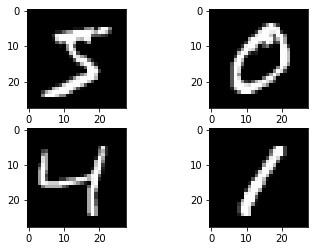

In [1]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [ ]:

...
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:

...
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

In [ ]:

...
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:

...
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:

...
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))